Normalizing text in NLP refers to the process of transforming text into a consistent and standard format, which helps improve the performance of machine learning models. It involves several techniques to make the text cleaner and more uniform. Here are some common methods of text normalization:

Lowercasing: Converting all the characters in the text to lowercase so that the model treats words like “Apple” and “apple” as the same.

Removing Punctuation: Stripping out punctuation marks like commas, periods, and question marks, which are often not needed for text analysis tasks like classification.

Removing Stop Words: Stop words are common words such as "the," "is," "and," "to," etc., which often don't carry significant meaning in text analysis. These can be removed to reduce noise.

Tokenization: Breaking the text into smaller chunks like words or sub-words. This helps in understanding the structure of the text.

Stemming: Reducing words to their root form. For example, “running,” “runner,” and “ran” would all be reduced to “run.”

Lemmatization: Similar to stemming, but instead of just cutting off prefixes or suffixes, lemmatization converts a word into its dictionary form. For example, “better” would be lemmatized to “good.”

Removing Special Characters: Removing non-alphanumeric characters like numbers, symbols, or any other characters that do not contribute meaningfully to the text.

Handling Unicode Characters: Converting Unicode characters to a standard format (e.g., converting special characters to ASCII).

Correcting Spelling: Detecting and correcting spelling errors in the text.

Expanding Contractions: Expanding words like “I’m” to “I am,” “don’t” to “do not,” and so on.

In [ ]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/TCS.xlsx")
df

,Unnamed: 0,Company,Date,Pros,Cons
0,0,Tata Consultancy Service,['2 Feb 2022'],['salary on time not so much work 5 day week l...,['nothing that i came across']
1,1,Tata Consultancy Service,['2 Feb 2022'],['Good work environment good learning curve'],['Stuck doing the same thing']
2,2,Tata Consultancy Service,['2 Feb 2022'],['It has good environment and work culture'],"[""I don't think there are any cons""]"
3,3,Tata Consultancy Service,['2 Feb 2022'],['Just ok. Not for freshers.'],['Low pay. Not everyone gets the desired proje...
4,4,Tata Consultancy Service,['2 Feb 2022'],['Good work culture but depends on project'],['Salary growth is very slow if you are a fres...
...,...,...,...,...,...
11932,11932,Tata Consultancy Service,['4 Mar 2021'],['Scope to learn based on the project'],['Less increments and more employee efforts sh...
11933,11933,Tata Consultancy Service,['4 Mar 2021'],"['Work life balance, Not much pressure environ...","['Low salary, yearly benefits are not much eve..."
11934,11934,Tata Consultancy Service,['4 Mar 2021'],['Work balance life balance ok'],['Work balance life balance can be better']
11935,11935,Tata Consultancy Service,['4 Mar 2021'],"['Flexible timing, global clients, safe workpl...",['Less options for career growth']


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11937 entries, 0 to 11936
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11937 non-null  int64 
 1   Company     11937 non-null  object
 2   Date        11937 non-null  object
 3   Pros        11937 non-null  object
 4   Cons        11937 non-null  object
dtypes: int64(1), object(4)
memory usage: 466.4+ KB


,Unnamed: 0
count,11937.000000
mean,5968.000000
std,3446.059416
min,0.000000
25%,2984.000000
50%,5968.000000
75%,8952.000000
max,11936.000000


In [ ]:
#remove brackets from date column
df['Date'] = df['Date'].astype(str).str.replace('[', '', regex=False).str.replace(']', '', regex=False)
df['Date'] = df['Date'].astype(str).str.replace('\'', '', regex=False).str.replace('\'', '', regex=False)
df


,Unnamed: 0,Company,Date,Pros,Cons
0,0,Tata Consultancy Service,2 Feb 2022,['salary on time not so much work 5 day week l...,['nothing that i came across']
1,1,Tata Consultancy Service,2 Feb 2022,['Good work environment good learning curve'],['Stuck doing the same thing']
2,2,Tata Consultancy Service,2 Feb 2022,['It has good environment and work culture'],"[""I don't think there are any cons""]"
3,3,Tata Consultancy Service,2 Feb 2022,['Just ok. Not for freshers.'],['Low pay. Not everyone gets the desired proje...
4,4,Tata Consultancy Service,2 Feb 2022,['Good work culture but depends on project'],['Salary growth is very slow if you are a fres...
...,...,...,...,...,...
11932,11932,Tata Consultancy Service,4 Mar 2021,['Scope to learn based on the project'],['Less increments and more employee efforts sh...
11933,11933,Tata Consultancy Service,4 Mar 2021,"['Work life balance, Not much pressure environ...","['Low salary, yearly benefits are not much eve..."
11934,11934,Tata Consultancy Service,4 Mar 2021,['Work balance life balance ok'],['Work balance life balance can be better']
11935,11935,Tata Consultancy Service,4 Mar 2021,"['Flexible timing, global clients, safe workpl...",['Less options for career growth']


In [ ]:
# remove rows with dates 0 for day

# Convert 'Date' column to datetime objects, handling errors
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows where the day is 0
df = df[df['Date'].dt.day != 0]
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')
df


,Unnamed: 0,Company,Date,Pros,Cons
0,0,Tata Consultancy Service,02-02-2022,['salary on time not so much work 5 day week l...,['nothing that i came across']
1,1,Tata Consultancy Service,02-02-2022,['Good work environment good learning curve'],['Stuck doing the same thing']
2,2,Tata Consultancy Service,02-02-2022,['It has good environment and work culture'],"[""I don't think there are any cons""]"
3,3,Tata Consultancy Service,02-02-2022,['Just ok. Not for freshers.'],['Low pay. Not everyone gets the desired proje...
4,4,Tata Consultancy Service,02-02-2022,['Good work culture but depends on project'],['Salary growth is very slow if you are a fres...
...,...,...,...,...,...
11932,11932,Tata Consultancy Service,04-03-2021,['Scope to learn based on the project'],['Less increments and more employee efforts sh...
11933,11933,Tata Consultancy Service,04-03-2021,"['Work life balance, Not much pressure environ...","['Low salary, yearly benefits are not much eve..."
11934,11934,Tata Consultancy Service,04-03-2021,['Work balance life balance ok'],['Work balance life balance can be better']
11935,11935,Tata Consultancy Service,04-03-2021,"['Flexible timing, global clients, safe workpl...",['Less options for career growth']


In [ ]:
import string
df['Pros'] = df['Pros'].astype(str).str.translate(str.maketrans('', '', string.punctuation)) #punctuation removal
df['Pros'] = df['Pros'].str.lower() #lowercase

df['Cons'] = df['Cons'].astype(str).str.translate(str.maketrans('', '', string.punctuation)) #punctuation removal
df['Cons'] = df['Cons'].str.lower() #lowercase
df


,Unnamed: 0,Company,Date,Pros,Cons
0,0,Tata Consultancy Service,02-02-2022,salary on time not so much work 5 day week lot...,nothing that i came across
1,1,Tata Consultancy Service,02-02-2022,good work environment good learning curve,stuck doing the same thing
2,2,Tata Consultancy Service,02-02-2022,it has good environment and work culture,i dont think there are any cons
3,3,Tata Consultancy Service,02-02-2022,just ok not for freshers,low pay not everyone gets the desired projects
4,4,Tata Consultancy Service,02-02-2022,good work culture but depends on project,salary growth is very slow if you are a fresher
...,...,...,...,...,...
11932,11932,Tata Consultancy Service,04-03-2021,scope to learn based on the project,less increments and more employee efforts shou...
11933,11933,Tata Consultancy Service,04-03-2021,work life balance not much pressure environment,low salary yearly benefits are not much even a...
11934,11934,Tata Consultancy Service,04-03-2021,work balance life balance ok,work balance life balance can be better
11935,11935,Tata Consultancy Service,04-03-2021,flexible timing global clients safe workplace,less options for career growth


In [ ]:
#expanding common contractions in pros and cons using contractions library

!pip install contractions
import contractions

def expand_contractions(text):
    expanded_words = []
    for word in text.split():
        expanded_words.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

df['Pros'] = df['Pros'].apply(lambda x: expand_contractions(x))
df['Cons'] = df['Cons'].apply(lambda x: expand_contractions(x))
df


,Unnamed: 0,Company,Date,Pros,Cons
0,0,Tata Consultancy Service,02-02-2022,salary on time not so much work 5 day week lot...,nothing that i came across
1,1,Tata Consultancy Service,02-02-2022,good work environment good learning curve,stuck doing the same thing
2,2,Tata Consultancy Service,02-02-2022,it has good environment and work culture,i do not think there are any cons
3,3,Tata Consultancy Service,02-02-2022,just ok not for freshers,low pay not everyone gets the desired projects
4,4,Tata Consultancy Service,02-02-2022,good work culture but depends on project,salary growth is very slow if you are a fresher
...,...,...,...,...,...
11932,11932,Tata Consultancy Service,04-03-2021,scope to learn based on the project,less increments and more employee efforts shou...
11933,11933,Tata Consultancy Service,04-03-2021,work life balance not much pressure environment,low salary yearly benefits are not much even a...
11934,11934,Tata Consultancy Service,04-03-2021,work balance life balance ok,work balance life balance can be better
11935,11935,Tata Consultancy Service,04-03-2021,flexible timing global clients safe workplace,less options for career growth


In [ ]:
#remove extra spaces in pros and cons

import re

def remove_extra_spaces(text):
    # Remove extra spaces using regular expressions
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Pros'] = df['Pros'].apply(lambda x: remove_extra_spaces(x))
df['Cons'] = df['Cons'].apply(lambda x: remove_extra_spaces(x))
df


,Unnamed: 0,Company,Date,Pros,Cons
0,0,Tata Consultancy Service,02-02-2022,salary on time not so much work 5 day week lot...,nothing that i came across
1,1,Tata Consultancy Service,02-02-2022,good work environment good learning curve,stuck doing the same thing
2,2,Tata Consultancy Service,02-02-2022,it has good environment and work culture,i do not think there are any cons
3,3,Tata Consultancy Service,02-02-2022,just ok not for freshers,low pay not everyone gets the desired projects
4,4,Tata Consultancy Service,02-02-2022,good work culture but depends on project,salary growth is very slow if you are a fresher
...,...,...,...,...,...
11932,11932,Tata Consultancy Service,04-03-2021,scope to learn based on the project,less increments and more employee efforts shou...
11933,11933,Tata Consultancy Service,04-03-2021,work life balance not much pressure environment,low salary yearly benefits are not much even a...
11934,11934,Tata Consultancy Service,04-03-2021,work balance life balance ok,work balance life balance can be better
11935,11935,Tata Consultancy Service,04-03-2021,flexible timing global clients safe workplace,less options for career growth


In [ ]:
# prompt: remove stop words from pros and cons

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

df['Pros'] = df['Pros'].apply(lambda x: remove_stopwords(x))
df['Cons'] = df['Cons'].apply(lambda x: remove_stopwords(x))
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Company,Date,Pros,Cons
0,0,Tata Consultancy Service,02-02-2022,salary time much work 5 day week lots holidays,nothing came across
1,1,Tata Consultancy Service,02-02-2022,good work environment good learning curve,stuck thing
2,2,Tata Consultancy Service,02-02-2022,good environment work culture,think cons
3,3,Tata Consultancy Service,02-02-2022,ok freshers,low pay everyone gets desired projects
4,4,Tata Consultancy Service,02-02-2022,good work culture depends project,salary growth slow fresher
...,...,...,...,...,...
11932,11932,Tata Consultancy Service,04-03-2021,scope learn based project,less increments employee efforts recognised
11933,11933,Tata Consultancy Service,04-03-2021,work life balance much pressure environment,low salary yearly benefits much even top perfo...
11934,11934,Tata Consultancy Service,04-03-2021,work balance life balance ok,work balance life balance better
11935,11935,Tata Consultancy Service,04-03-2021,flexible timing global clients safe workplace,less options career growth


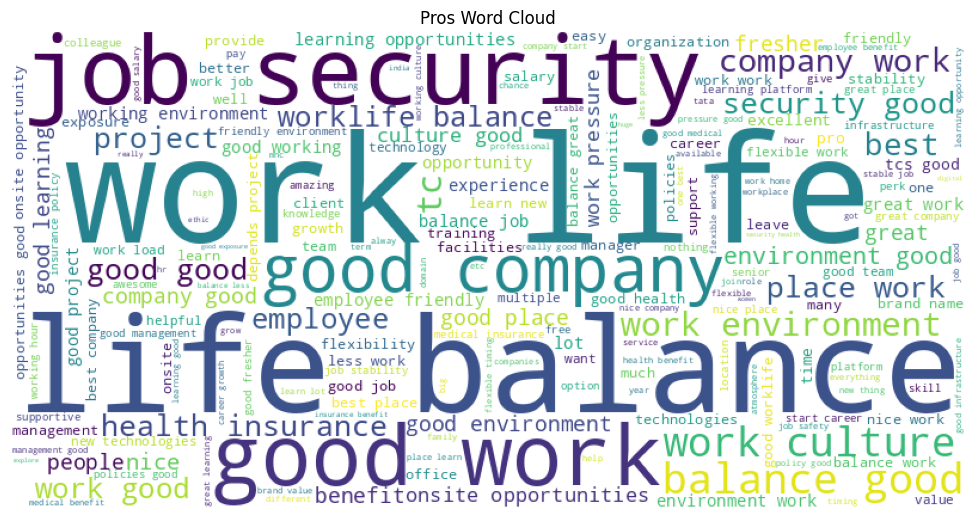

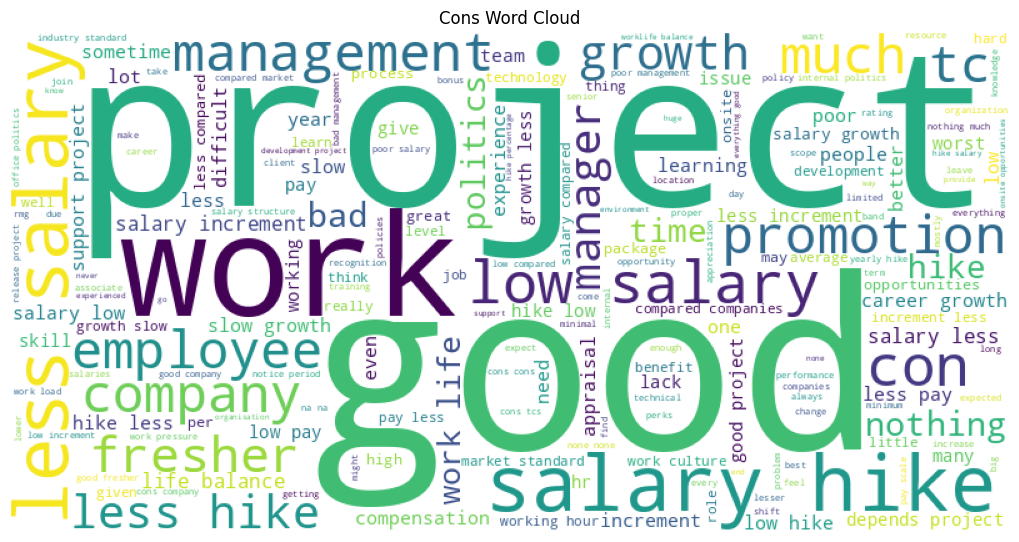

In [ ]:
# prompt: generate separate word clouds for pros and cols

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Pros' and 'Cons' columns

# Concatenate all pros and cons into single strings
text_pros = " ".join(review for review in df.Pros)
text_cons = " ".join(review for review in df.Cons)


# Create and generate a word cloud image for pros:
wordcloud_pros = WordCloud(width=800, height=400, background_color="white").generate(text_pros)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_pros)
plt.axis("off")
plt.title("Pros Word Cloud")
plt.tight_layout(pad=0)
plt.show()

# Create and generate a word cloud image for cons
wordcloud_cons = WordCloud(width=800, height=400, background_color="white").generate(text_cons)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_cons)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Cons Word Cloud")
plt.show()
